In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import librosa 
from scipy.fftpack import fft
import pywt

In [3]:
# read .mat file
from scipy.io import loadmat
mat = loadmat('data/VEH_HPCpyra/HPCpyra_events_ratID3.mat')
# mat = loadmat('data/PFCshal/PFCshal_events_ratID3.mat')
mat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'HPCpyra_complex_swr_veh', 'HPCpyra_ripple_veh', 'HPCpyra_swr_veh'])

In [4]:
dataset = 'HPCpyra_complex_swr_veh'

In [7]:
pd.DataFrame(mat[dataset]).iloc[:,10]

0      0.447582
1     14.774257
2     17.933194
3     -1.297360
4      3.480277
5      2.998908
6      3.986495
7      4.461897
8    -12.600749
9     -0.859362
10    -3.218766
11    -9.085571
12     9.661099
13     6.530798
14    21.996611
15    -6.231005
16   -25.416221
17   -25.618786
18   -19.390578
19    -7.883959
20   -16.361023
21    -3.487939
22    -2.810751
23   -28.459371
24    -5.037071
25    16.852148
26     4.030030
27    15.827930
28    17.574952
29    16.700856
30    -7.040116
31     2.570852
32    -1.997648
33   -13.507348
34    -2.304194
35     2.844319
36    12.726271
37     0.434080
38    -5.512802
39   -25.001457
40     2.260506
41    -7.786164
42     1.106675
43    -5.473555
44    15.317189
45    13.041191
46     0.732789
47    11.150570
48    -3.296051
49     4.516644
50    -3.473833
Name: 10, dtype: float64

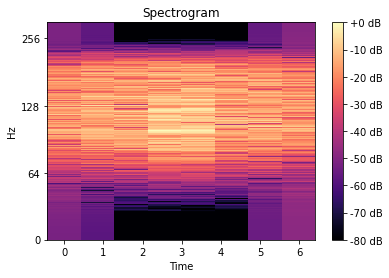

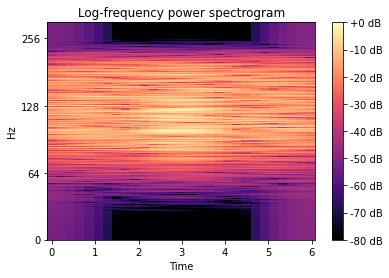

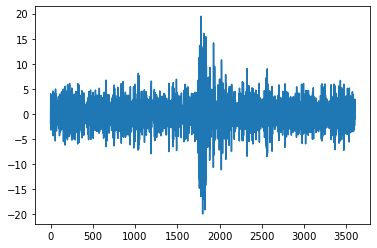

In [5]:

y, sr = mat[dataset][0] , 600

spec = np.abs(librosa.stft(y,))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')



fig, ax = plt.subplots()

hop_length = 128

D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,

                         x_axis='time', ax=ax)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

fig, ax = plt.subplots()

plt.plot(mat[dataset][0])

(1200,)


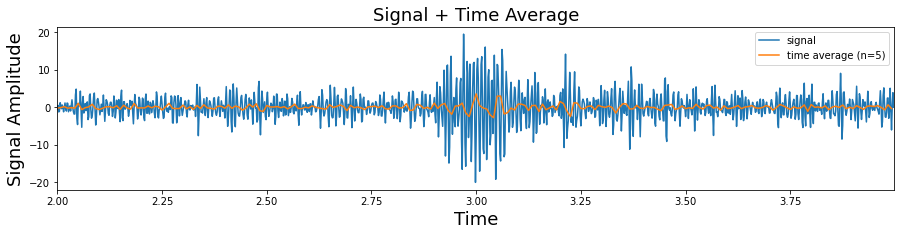

(600,) (600,)


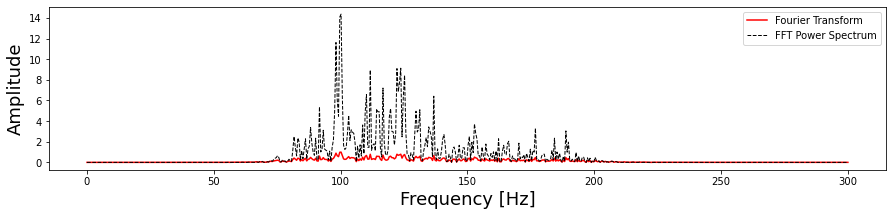

scale pseudo frequencies [600.         119.43573668  66.31853786  45.90361446  35.0990327
  28.41163311  23.86470404  20.57235421  18.07829181  16.12357173
  14.55031507  13.25678497  12.17446876  11.25553914  10.46559539
   9.77926078   9.17740576   8.64533696   8.17158177   7.74705165
   7.36445346   7.01786701   6.70243645   6.41414141   6.14962473
   5.90606108   5.68105569   5.47256535   5.27883616   5.09835407
   4.92980527   4.77204409   4.62406699   4.48499117   4.35403691
   4.23051299   4.11380446   4.0033624    3.89869532   3.79936179
   3.70496426   3.61514375   3.52957525   3.4479638    3.37004113
   3.29556267   3.224305     3.15606362   3.09065098   3.02789478
   2.96763641   2.90972965   2.85403948   2.80044101   2.74881859
   2.69906489   2.65108026   2.604772     2.56005375   2.51684503
   2.47507065   2.43466036   2.39554843   2.35767327   2.32097713
   2.28540579   2.25090834   2.21743685   2.18494624   2.153394
   2.12274006   2.09294661   2.0639779    2.03580016  

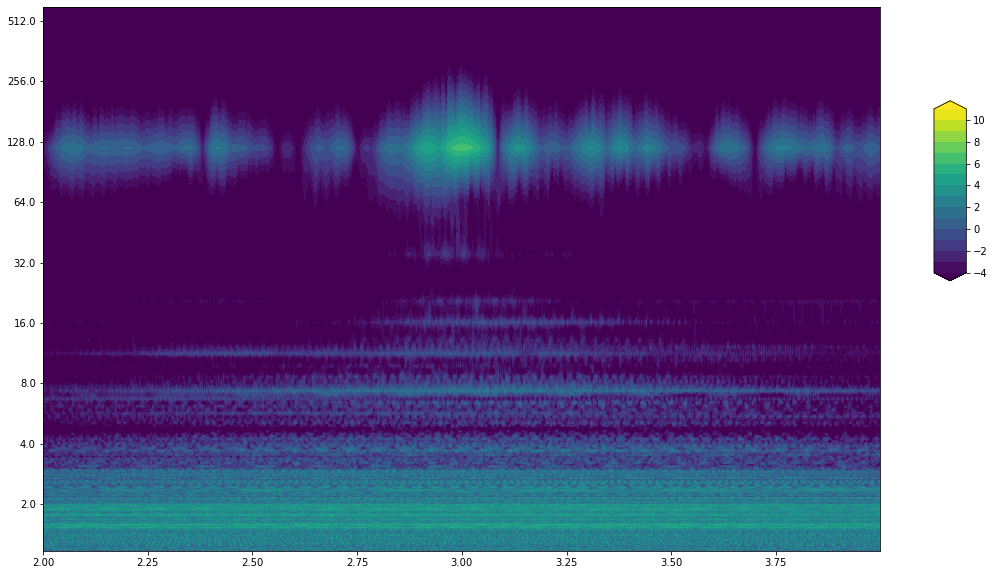

scale pseudo frequencies [600.         119.43573668  66.31853786  45.90361446  35.0990327
  28.41163311  23.86470404  20.57235421  18.07829181  16.12357173
  14.55031507  13.25678497  12.17446876  11.25553914  10.46559539
   9.77926078   9.17740576   8.64533696   8.17158177   7.74705165
   7.36445346   7.01786701   6.70243645   6.41414141   6.14962473
   5.90606108   5.68105569   5.47256535   5.27883616   5.09835407
   4.92980527   4.77204409   4.62406699   4.48499117   4.35403691
   4.23051299   4.11380446   4.0033624    3.89869532   3.79936179
   3.70496426   3.61514375   3.52957525   3.4479638    3.37004113
   3.29556267   3.224305     3.15606362   3.09065098   3.02789478
   2.96763641   2.90972965   2.85403948   2.80044101   2.74881859
   2.69906489   2.65108026   2.604772     2.56005375   2.51684503
   2.47507065   2.43466036   2.39554843   2.35767327   2.32097713
   2.28540579   2.25090834   2.21743685   2.18494624   2.153394
   2.12274006   2.09294661   2.0639779    2.03580016  

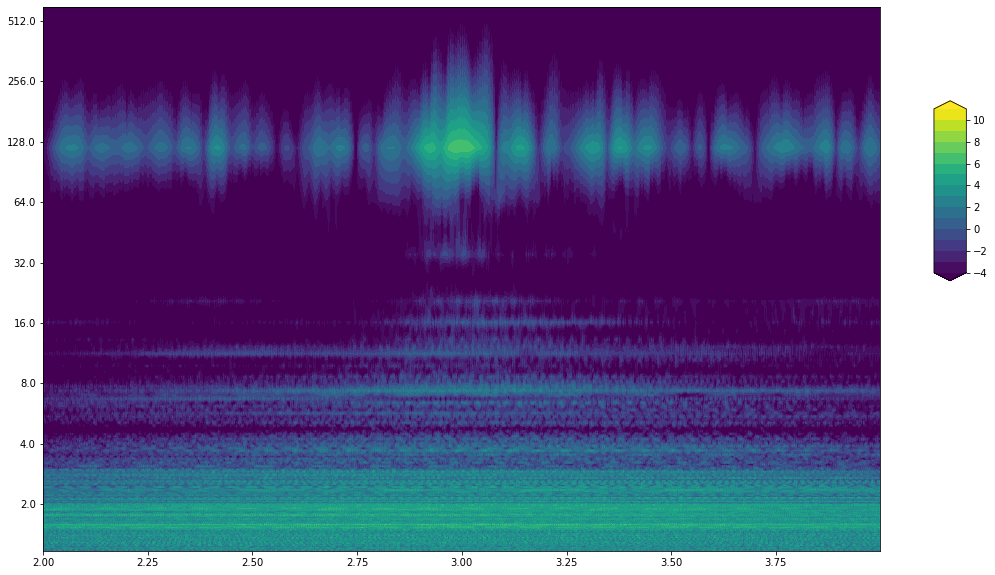

In [6]:

#taken from https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
def plot_wavelet_freq(time, signal, scales, 
                 waveletname = 'mor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,16,32,64,128,256,512,1024,2048,]
    contourlevels = np.log2(levels)
    print('scale pseudo frequencies',frequencies,frequencies.shape)
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(frequencies), np.log2(power), contourlevels, extend='both',cmap=cmap)
        
    yticks =  2**np.arange(np.ceil(np.log2(frequencies.min())), np.ceil(np.log2(frequencies.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")

    plt.show()

def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()


def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    print(f_values.shape, fft_values.shape)
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()
    return f_values,fft_power
def get_ave_values(xvalues, yvalues, n = 5):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = np.array(xvalues)
    yarr = np.array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = np.nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave


df, sr= pd.DataFrame(mat[dataset][0]), 600
#swr
#does 0,7,8 counts as two ripples?
#complex
#5 is not aligned
#does 6 counts as two ripples?
N = df.shape[0]
t0=0
dt=1/sr
duration = 2
time = np.arange(int(N/2 - duration/2*sr), int(N/2 + duration/2*sr)) * dt + t0
signal = df.values.squeeze()[int(N/2-duration/2*sr):int(N/2+ duration/2*sr)]
print(time.shape)
scales = np.linspace(1,512, 128)#np.arange(1, 124)

plot_signal_plus_average(time, signal)
f_values,fft_power = plot_fft_plus_power(time, signal)
# plot_wavelet(time, signal, scales)
plot_wavelet_freq(time, signal, scales,waveletname='cmor20.5-1.0',cmap=None)

plot_wavelet_freq(time, signal, scales,waveletname='cmor10.5-1.0',cmap=None)

# duration = 0.4
# time = np.arange(int(N/2 - duration/2*sr), int(N/2 + duration/2*sr)) * dt + t0
# signal = df.values.squeeze()[int(N/2-duration/2*sr):int(N/2+ duration/2*sr)]
# plot_signal_plus_average(time, signal)



In [37]:
#check relation between scales and frequencies
print(pywt.scale2frequency('cmor1.5-1.0',np.linspace(2,512, 64))/dt)
pywt.scale2frequency('cmor10.5-1.0',np.linspace(2,512, 32))/dt


[300.          59.43396226  32.98429319  22.82608696  17.45152355
  14.12556054  11.86440678  10.22727273   8.9871612    8.01526718
   7.23306544   6.58995816   6.0518732    5.59502664   5.20231214
   4.86111111   4.56191166   4.29740791   4.06189555   3.85085575
   3.66066241   3.48837209   3.3315706    3.18825911   3.05676856
   2.93569432   2.82384581   2.72020725   2.62390671   2.53419147
   2.4504084    2.37198795   2.29843123   2.22929936   2.16420474
   2.10280374   2.04479065   1.98989261   1.93786527   1.88848921
   1.84156679   1.79691957   1.75438596   1.71381937   1.67508641
   1.63806552   1.60264564   1.5687251    1.53621068   1.50501672
   1.47506439   1.44628099   1.41859941   1.39195758   1.36629798
   1.34156729   1.31771596   1.2946979    1.27247021   1.25099285
   1.23022847   1.21014214   1.19070119   1.171875  ]


array([300.        ,  32.51748252,  17.19038817,  11.68341709,
         8.84871551,   7.12098009,   5.95771941,   5.12114537,
         4.49058426,   3.99828031,   3.60325455,   3.27926657,
         3.00873504,   2.77943814,   2.58261594,   2.41182573,
         2.2622233 ,   2.1300962 ,   2.0125514 ,   1.90730107,
         1.81251218,   1.72669885,   1.64864386,   1.57734057,
         1.51194928,   1.45176397,   1.39618676,   1.34470792,
         1.29689025,   1.25235658,   1.21077985,   1.171875  ])

,f_values,fft_power
2,1.001669,12548.064752
4,2.003339,7653.558103
8,4.006678,3401.518685
6,3.005008,3351.596116
1,0.500835,2822.798940
9,4.507513,1825.049127
15,7.512521,1308.847188
5,2.504174,1221.434490
7,3.505843,1156.307745
28,14.023372,1027.993110


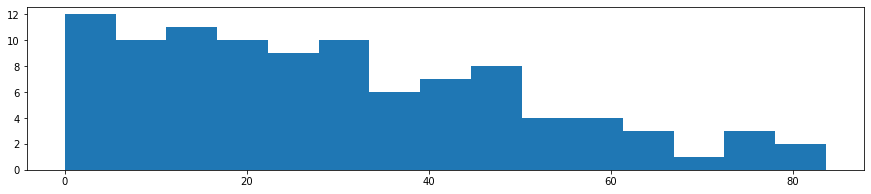

In [27]:
#pandas configure max display rows
pd.set_option('display.max_rows', None)

df =pd.DataFrame([f_values,fft_power]).T
df.columns = ['f_values','fft_power']
df.sort_values(by='fft_power', ascending=False, inplace=True)
df = df.head(100)
#plot histogram with first 100 fft power values
fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(df['f_values'], bins=15, density=False, label='FFT Power Spectrum')
df

Create csv with class distribution

In [8]:
import h5py
import json
root_dir = 'proc_data/HPC_CBD_PCA/'
data_df = pd.DataFrame(os.listdir(root_dir), columns=['filename'])
#remove rows with .csv in filename
data_df = data_df[~data_df['filename'].str.contains('.csv')]
data_df['rat_id'] = data_df.filename.apply(lambda x: int(x.split('_')[-1].split('.')[0].split('ratID')[1]))
data_df.rat_id.unique()
sizes = []
label_dict = {'complex':[], 'ripple':[], 'swr':[]}

for file in data_df.filename:
    print(file)
    #load h5 file
    f = h5py.File(root_dir+file, 'r')
    label_arr = json.loads(f.attrs['data_types'])
    #get size of dataset
    sizes.append(f['x'].shape)
    y = pd.Series(f['y']).apply(lambda x: label_arr[x])
    # print(y.value_counts(),y[(~y.str.contains('complex')) & (y.str.contains('swr'))].shape[0])
    label_dict['complex'].append(y[y.str.contains('complex')].shape[0]) 
    label_dict['ripple'].append(y[y.str.contains('ripple')].shape[0])
    label_dict['swr'].append(y[~y.str.contains('complex') & y.str.contains('swr')].shape[0])
    f.close()
    # break
data_df['sizes'] = sizes
data_df['complex'] = label_dict['complex']
data_df['swr'] = label_dict['swr']
data_df['ripple'] = label_dict['ripple']
data_df


dataset_HPCpyra_ratID214.hdf5
dataset_HPCpyra_ratID205.hdf5
dataset_HPCpyra_ratID10.hdf5
dataset_HPCpyra_ratID5.hdf5
dataset_HPCpyra_ratID2.hdf5
dataset_HPCpyra_ratID207.hdf5
dataset_HPCpyra_ratID209.hdf5
dataset_HPCpyra_ratID212.hdf5
dataset_HPCpyra_ratID204.hdf5
dataset_HPCpyra_ratID11.hdf5


,filename,rat_id,sizes,complex,swr,ripple
0,dataset_HPCpyra_ratID214.hdf5,214,"(503, 8, 90)",126,117,260
1,dataset_HPCpyra_ratID205.hdf5,205,"(759, 8, 90)",135,218,406
2,dataset_HPCpyra_ratID10.hdf5,10,"(858, 8, 90)",7,791,60
3,dataset_HPCpyra_ratID5.hdf5,5,"(789, 8, 90)",320,72,397
4,dataset_HPCpyra_ratID2.hdf5,2,"(1376, 8, 90)",124,857,395
5,dataset_HPCpyra_ratID207.hdf5,207,"(1381, 8, 90)",219,365,797
6,dataset_HPCpyra_ratID209.hdf5,209,"(695, 8, 90)",126,191,378
7,dataset_HPCpyra_ratID212.hdf5,212,"(988, 8, 90)",194,273,521
8,dataset_HPCpyra_ratID204.hdf5,204,"(794, 8, 90)",1,772,21
10,dataset_HPCpyra_ratID11.hdf5,11,"(839, 8, 90)",8,709,122


In [11]:
data_df.rat_id.values

array([214, 205,  10,   5,   2, 207, 209, 212, 204,  11])

In [9]:
data_df.to_csv('cbd_class_distribution.csv', index=False)